<a href="https://colab.research.google.com/github/dormeir999/cities-classifier/blob/master/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & setup

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import zipfile
import glob
import os
from google.colab import drive
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import tensorflow as tf
from pathlib import Path
import glob
import numpy as np
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path_model = '/content/gdrive/My Drive/adidas/02-model'
path_data =  '/content/gdrive/My Drive/adidas/01-data'
os.listdir(path_model) # test

['.ipynb_checkpoints',
 'weights',
 'logs',
 'model',
 'LeNet-Model',
 'tf image classification.ipynb',
 'tf image classification - Dor.ipynb',
 'Daniel Research Log.gdoc',
 'GAN',
 'inceptionsV3_19cities_at.h5',
 'inceptionsV3_19cities.h5',
 'MobileNet-19cities-ACC90.h5']

In [ ]:
# colab output:
output_folder_path = '.'
output_folder_path = Path(output_folder_path)

# Load Data


In [ ]:
# get list of links from aws
map_links = pd.read_csv(
    'https://ww-research.s3-us-west-2.amazonaws.com/Arad/adidas/mapillary_links.csv'
    ,header=None).iloc[:,0].to_list()

In [ ]:
def download_url(url, save_path=False, chunk_size=128):
    "downloads zip files to the folder that the notebook / python file is saved"
    if not save_path:
        save_path = url.split('/')[-1]

    with requests.get(url, stream=True) as r:
        with open(save_path, 'wb') as fd:
            for chunk in r.iter_content(chunk_size=chunk_size):
                fd.write(chunk)
    print(f"file {save_path} succesfuly downloaded")

    
def unzip_to_structure(zipfile_path, output_root_folder):
    """unzips files to specified output root folder with structure: 
        <output_root_folder> / <set_type> / <city> / <img_key>.jpg"""
    output_root_folder = Path(output_root_folder)
    file_parts = str(Path(zipfile_path).stem).split('_')
    city = file_parts[0]
    set_type = file_parts[1]
    for s in ['train','test','val']:   
      with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
        if set_type == s:
          zip_ref.extractall(output_root_folder / s )
    print(f"images from '{zipfile_path}' succesfuly unziped to '{output_root_folder / set_type / city}'")


def get_images(cities,output_path=output_folder_path,download_test=False):
  """gets all images for defined cities
  param:: cities, array of cities
  param:: output_path """
  linkz = []
  if not download_test:
    links = [l for l in map_links if 'test' not in l]
  else:
    links = map_links
  for city in cities:
    for link in links:
      if city in link:
        linkz.append(link) 
  # download files to current directory
  for link in linkz:
      download_url(link)
  # unzip images to destination with format: 
  # <output_root_folder> / <set_type> / <city> / <img_key>.jpg
  for link in linkz:
      filename = Path(link).name
      unzip_to_structure(filename,output_path)  

In [ ]:
# get data to current working dir (for changing dir got to top of the notebook):

# available cities:
my_cities = ['saopaulo','moscow','paris','manila','ottawa','austin','bangkok',
 'sf','phoenix','melbourne','tokyo','goa','toronto','berlin', 'budapest',
 'cph','helsinki','boston','amsterdam']

# city selection:
# my_cities = ['saopaulo','paris','goa']

# download images from aws:
get_images(my_cities,download_test=True) 

file saopaulo_train.zip succesfuly downloaded
file saopaulo_val.zip succesfuly downloaded
file saopaulo_test.zip succesfuly downloaded
file moscow_train.zip succesfuly downloaded
file moscow_val.zip succesfuly downloaded
file moscow_test.zip succesfuly downloaded
file paris_train.zip succesfuly downloaded
file paris_val.zip succesfuly downloaded
file paris_test.zip succesfuly downloaded
file manila_train.zip succesfuly downloaded
file manila_val.zip succesfuly downloaded
file manila_test.zip succesfuly downloaded
file ottawa_train.zip succesfuly downloaded
file ottawa_val.zip succesfuly downloaded
file ottawa_test.zip succesfuly downloaded
file austin_train.zip succesfuly downloaded
file austin_val.zip succesfuly downloaded
file austin_test.zip succesfuly downloaded
file bangkok_train.zip succesfuly downloaded
file bangkok_val.zip succesfuly downloaded
file bangkok_test.zip succesfuly downloaded
file sf_train.zip succesfuly downloaded
file sf_val.zip succesfuly downloaded
file sf_test.

In [ ]:
!rm *.zip


rm: cannot remove '*.zip': No such file or directory


In [ ]:
rm -rf sample_data

In [ ]:
# def get_data_to_numpy(file_list):
#     X = []
#     y = []

#     for filename in file_list :
#         img = img_to_array(load_img(filename, target_size = (128,128)))
#         X.append(img)
#         parts = tf.strings.split(filename, os.path.sep)
#   # The second to last is the class-directory
#         y.append(parts[-2])

#     X = np.array(X).astype('float32')
#     # X = (X - X.mean()) / X.mean()
#     X = X / 255
#     return X, y

# import glob
# from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# train_filelist = glob.glob('./train/*/*')
# val_filelist = glob.glob('./val/*/*')
# test_filelist = glob.glob('./train/*/*')
# len(train_filelist), len(val_filelist), len(test_filelist)

# X_train, y_train = get_data_to_numpy(train_filelist)
# X_val, y_val = get_data_to_numpy(val_filelist)
# X_test, y_test = get_data_to_numpy(test_filelist)

In [ ]:
# Y_train = [] 
# for y in y_train:
#   Y_train.append(y.numpy())

# Y_test = [] 
# for y in y_test:
#   Y_test.append(y.numpy())

# Y_val = [] 
# for y in y_val:
#   Y_val.append(y.numpy())

In [ ]:
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# vocab = ['paris', 'goa', 'saopaulo']

# input = tf.compat.v1.placeholder(dtype=tf.string, shape=(None,))
# matches = tf.stack([tf.equal(input, s) for s in vocab], axis=-1)
# onehot = tf.cast(matches, tf.float32)

# with tf.compat.v1.Session() as sess:
#     Y_train_one_hot = sess.run(onehot, feed_dict={input: Y_train})
# with tf.compat.v1.Session() as sess:
#     Y_test_one_hot = sess.run(onehot, feed_dict={input: Y_test})
# with tf.compat.v1.Session() as sess:
#     Y_val_one_hot = sess.run(onehot, feed_dict={input: Y_val})

NameError: ignored

In [ ]:
# from sklearn.utils import shuffle
# X_train, Y_train_one_hot = shuffle(X_train, Y_train_one_hot)
# X_test, Y_test_one_hot = shuffle(X_test, Y_test_one_hot)

# Image Preprocessing

In [ ]:
import os
import tensorflow as tf
from pathlib import Path
import glob
import numpy as np
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Remove Outliers
Some helpr functions:

In [ ]:
# I changed some layers here so that the final output will have the same output size as our images - 150x150x3

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

def decode_images_using_existing_model_weights(dataset,weights_path = '/weights/Auto-Encoders.ckpt'):
  """Recives a numpy dataset, returns a decoded dataset using the pre-trained 
  auto-enocder weights"""
  # Create the CV for decoding
  input_img = Input(shape=(128, 128, 3))  # adapt this if using `channels_first` image data format
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  #x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2), padding='same')(x)
  # at this point the representation is (4, 4, 8) i.e. 128-dimensional
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(16, (3, 3), activation='relu')(x)
  #x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')#, metrics=['accuracy'])
  autoencoder.summary()

  # load weights
  checkpoint_filepath = path_model + weights_path
  autoencoder.load_weights(checkpoint_filepath)
  return autoencoder.predict(dataset)

def clean_dataset_from_outlier(dataset, decoded_dataset, outlier_threshold=0.99):
  """Receives the origionl and the autoencoded numpy dataset, return cleaned dataset
  without (default) 1% of images which are least similair to their decoded
  image, and the indices for the outliers."""
  squred_error = np.power(X_train - decoded_dataset, 2)
  channel_ax = 3
  width_ax = 1
  height_ax = 1
  mse = np.mean(np.mean(squred_error,axis=(channel_ax,width_ax)),axis=height_ax)
  mse_anomally_threshold = np.quantile(mse, outlier_threshold)
  outliers_idx = np.where(mse > mse_anomally_threshold)
  inliners_idx = np.where(mse <= mse_anomally_threshold)
  return dataset[inliners_idx], outliers_idx[0]

def show_origional_and_decoded(origional,decoded, n=5, show_decoded=True):
  'Show random n images and their decoded images'
  n+=1
  images_index = np.random.choice(len(origional),n)
  plt.figure(figsize=(20, 5))
  for i in range(1,n):
      ax = plt.subplot(1, n, i)
      plt.imshow(origional[images_index[i]])
      #plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

  plt.figure(figsize=(20, 5))

  if show_decoded:
    for i in range(1,n):
        ax = plt.subplot(1, n, i)
        plt.imshow(decoded[images_index[i]])
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Using TensorFlow backend.


* Uncomment the last line for cleaning a numpy dataset of images from outliers (using a threshold of percentage of outliers images).
* Uncomment the two lines before for getting the decoded datasets - more gerneralized form of the photos, which might remove outliers pixels.

In [ ]:
def remove_outliers(numpy_dataset, outlier_threshold=0.99):
  'Recievs a numpy dataset, return the cleand dataset and the indices of outliers'
  decoded_imgs = decode_images_using_existing_model_weights(numpy_dataset)
  cleaned_dataset, outliers_idx = clean_dataset_from_outlier(numpy_dataset, decoded_imgs,outlier_threshold=0.98)
  return cleaned_dataset, outliers_idx

decoded_imgs = decode_images_using_existing_model_weights(X_train)
show_origional_and_decoded(X_train,decoded_imgs, n=5)

X_train_cleaned, outlier_idx = remove_outliers(X_train, outlier_threshold=0.99)

NameError: ignored

## Set image and batch size

In [ ]:
IMG_WIDTH = 96
IMG_HEIGHT = 96
BATCH_SIZE = 512

In [ ]:
train_dir = Path("./train")
val_dir = Path("./val")
test_dir = Path("./test")

In [ ]:
CLASS_NAMES = np.array([item.name for item in train_dir.glob('*')])
CLASS_NAMES

array(['goa', 'boston', 'berlin', 'helsinki', 'phoenix', 'toronto',
       'saopaulo', 'austin', 'paris', 'moscow', 'sf', 'cph', 'amsterdam',
       'budapest', 'bangkok', 'tokyo', 'manila', 'ottawa', 'melbourne'],
      dtype='<U9')

In [ ]:
train_image_count = len(list(train_dir.glob('*/*.jpg')))
val_image_count = len(list(val_dir.glob('*/*.jpg')))
test_image_count = len(list(test_dir.glob('*/*.jpg')))
train_image_count,val_image_count,test_image_count

(117810, 36091, 36099)

## Cached processing \ tf.data.Dataset

In [ ]:
list_train = tf.data.Dataset.list_files(str(train_dir/"*/*"))
list_val = tf.data.Dataset.list_files(str(val_dir/"*/*"))
list_test = tf.data.Dataset.list_files(str(test_dir/"*/*"),shuffle=False)

In [ ]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
def augment(image,label):
  # image,label = convert(image, label)
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  image = tf.image.resize_with_crop_or_pad(image, int(IMG_WIDTH*1.2), int(IMG_HEIGHT*1.2)) # Add 6 pixels of padding
  image = tf.image.random_crop(image, size=[BATCH_SIZE,IMG_WIDTH, IMG_HEIGHT, 3]) # Random crop back to 28x28
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  # image = tf.image.rot90(image,tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))

  return image,label

In [ ]:
def prepare_for_training(ds, aug=False, cache=False, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  if aug:
    ds = ds.map(augment, num_parallel_calls=AUTOTUNE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [ ]:
# Use Dataset.map to create a dataset of image, label pairs:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_train = list_train.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_val = list_val.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_test = list_test.map(process_path, num_parallel_calls=AUTOTUNE)

train_dataset = prepare_for_training(labeled_train,aug=True,cache=True)
val_dataset = prepare_for_training(labeled_val,cache=True)
test_dataset = labeled_test.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# prepare test_np before intensive ram usage
test_np = np.stack(list(test_dataset))

## Augmentation attempt

# Build, complie & train

# resnet utils:

In [ ]:
from tensorflow.keras.applications import ResNet50
# ResNet-50 that is a smaller version of ResNet 152 
# and frequently used as a starting point for transfer learning.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# set checkpoint:
checkpoint_filepath = path_model + '/weights/ResNet19.ckpt'
model_cp_cb = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True)
checkpoint_filepath

'/content/gdrive/My Drive/adidas/02-model/weights/ResNet19.ckpt'

In [ ]:
num_classes = 19
base_model = ResNet50(weights= None, 
                      include_top=False, 
                      input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 102, 102, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 48, 48, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 48, 48, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
STEPS_PER_EPOCH = np.ceil(train_image_count/BATCH_SIZE)
VAL_STEPS = np.ceil(val_image_count/BATCH_SIZE)


In [ ]:
import os.path
from os import path

if path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5,verbose=1,restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(patience=4,verbose=1)

logdir = "./logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1)


history = model.fit(train_dataset, steps_per_epoch=STEPS_PER_EPOCH,
          epochs=40, 
          verbose=1, 
          validation_data=val_dataset,validation_steps=VAL_STEPS,
          callbacks=[model_cp_cb,tensorboard_callback,es_callback,reduce_lr])

Epoch 1/40
231/231 [==============================] - 337s 1s/step - loss: 3.6151 - accuracy: 0.1085 - val_loss: 3.4791 - val_accuracy: 0.0421 - lr: 1.0000e-04
Epoch 2/40
231/231 [==============================] - 131s 565ms/step - loss: 2.6793 - accuracy: 0.2216 - val_loss: 3.2951 - val_accuracy: 0.0783 - lr: 1.0000e-04
Epoch 3/40
231/231 [==============================] - 131s 566ms/step - loss: 2.1698 - accuracy: 0.3713 - val_loss: 2.3246 - val_accuracy: 0.3402 - lr: 1.0000e-04
Epoch 4/40
231/231 [==============================] - 131s 565ms/step - loss: 1.7499 - accuracy: 0.4904 - val_loss: 1.9350 - val_accuracy: 0.4471 - lr: 1.0000e-04
Epoch 5/40
231/231 [==============================] - 130s 564ms/step - loss: 1.3642 - accuracy: 0.6035 - val_loss: 1.9967 - val_accuracy: 0.4492 - lr: 1.0000e-04
Epoch 6/40
231/231 [==============================] - 130s 565ms/step - loss: 1.1269 - accuracy: 0.6791 - val_loss: 1.6083 - val_accuracy: 0.5559 - lr: 1.0000e-04
Epoch 7/40
231/231 [=====

# Evaluate model on test set

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np

In [ ]:
# Get y_true and y_pred
X_true = np.array([l[0].numpy() for l in list(labeled_test)])
Y_true = np.array([list(l[1].numpy()) for l in list(labeled_test)])
y_true = np.argmax(Y_true,axis=1)
Y_pred = model.predict(np.array(X_true),verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

1129/1129 [==============================] - 20s 18ms/step


In [ ]:
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

Classification Report
              precision    recall  f1-score   support

         goa       0.00      0.00      0.00      2427
      boston       0.00      0.00      0.00      1610
      berlin       0.00      0.00      0.00      2005
    helsinki       0.04      0.98      0.08      1561
     phoenix       0.00      0.00      0.00      1579
     toronto       0.00      0.00      0.00      1867
    saopaulo       0.00      0.00      0.00      1771
      austin       0.00      0.00      0.00      1660
       paris       0.00      0.00      0.00      2320
      moscow       0.00      0.00      0.00      1522
          sf       0.00      0.00      0.00      2087
         cph       0.00      0.00      0.00      1725
   amsterdam       0.00      0.00      0.00      2021
    budapest       0.00      0.00      0.00      1146
     bangkok       0.00      0.00      0.00      1760
       tokyo       0.00      0.00      0.00      2149
      manila       0.00      0.00      0.00      2352
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix


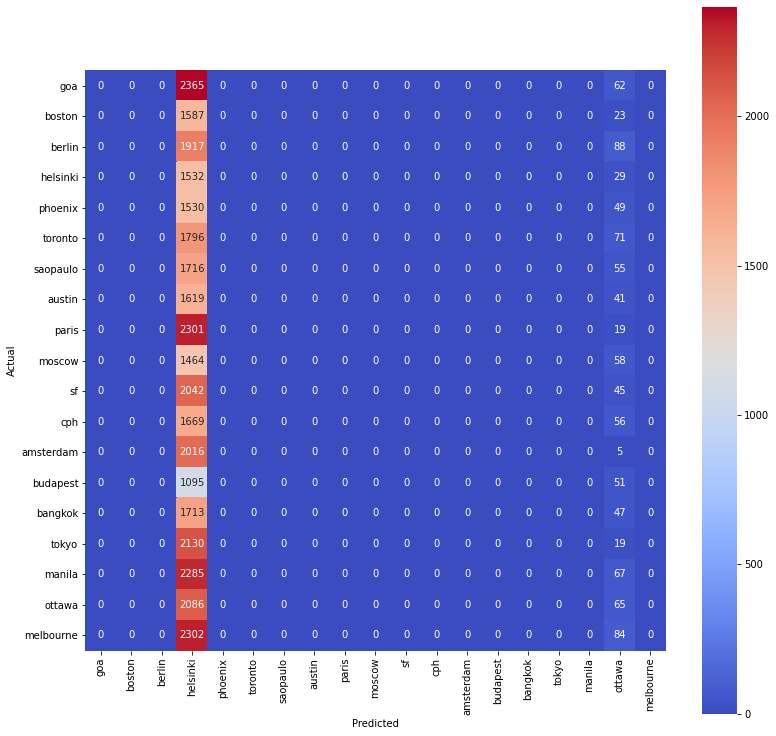

In [ ]:

print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(13,13))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'coolwarm',square=True,xticklabels=CLASS_NAMES,yticklabels=CLASS_NAMES)
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual');

# Attempt at generalization

1/1 [==============================] - 0s 1ms/step


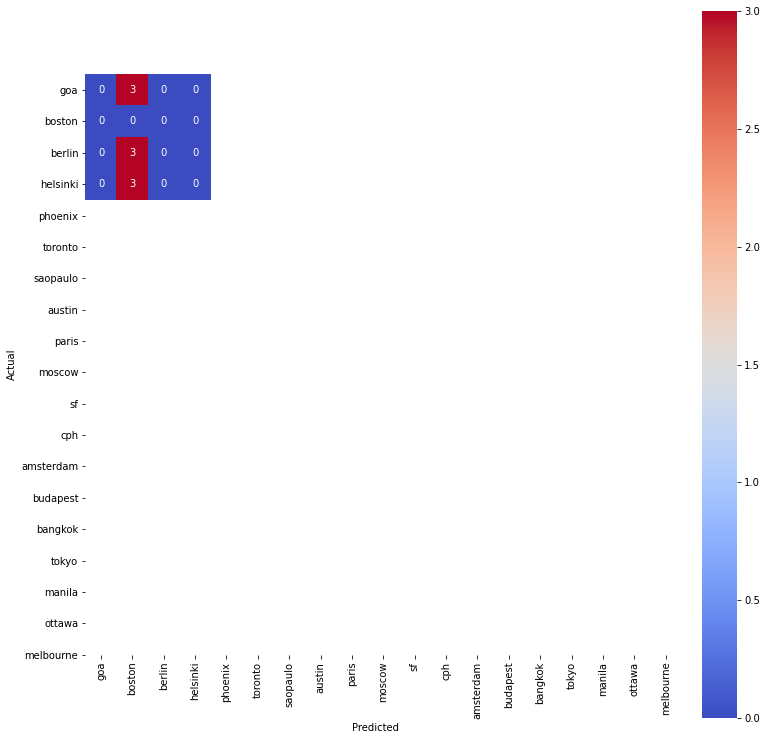

In [ ]:
# Setup generalization dataset (from drive)
gen_dir = Path(path_data+'/generalization/')
list_gen = tf.data.Dataset.list_files(str(gen_dir/"*/*"),shuffle=False)
labeled_gen = list_gen.map(process_path, num_parallel_calls=AUTOTUNE)
gen_dataset = prepare_for_training(labeled_gen)

# Get y_true and y_pred
X_true = np.array([l[0].numpy() for l in list(labeled_gen)])
Y_true = np.array([list(l[1].numpy()) for l in list(labeled_gen)])
y_true = np.argmax(Y_true,axis=1)
Y_pred = model.predict(np.array(X_true),verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(13,13))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'coolwarm',square=True,xticklabels=CLASS_NAMES,yticklabels=CLASS_NAMES)
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
def get_data(file_list,norm_range=[-1,1],img_size=(128,128)):
    X = []
    for filename in file_list :
        img = img_to_array(load_img(filename, target_size = img_size))
        X.append(img)
    X = np.array(X).astype('float32')
    if norm_range == [-1,1]:
      X = (X - X.mean()) / X.std()
      X = np.clip(X,-1,1)
    elif norm_range == [0,1]:
      X = X / 255
    else:
      print('bad range')
      return
    return X,X.mean(),X.std()

In [ ]:
paris_files = glob.glob('./train/paris/*')

AttributeError: ignored

In [ ]:
dataset,mean,std = get_data(paris_files)

In [ ]:
dataset.min(),dataset.max()

(-1.0, 1.0)

In [ ]:
# (X - X.mean()) / X.std()

im = dataset[2]

plt.imshow(im*im.std() + im.mean());


NameError: ignored